# Import verything

In [1]:
%reset
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pandas as pd
import PIL.Image
import multiprocessing
from scipy.spatial.distance import cdist
from scipy.stats import kstest, entropy
from scipy.special import rel_entr
from scipy.stats import wasserstein_distance
import seaborn as sns


import utility
import colorDetect_20250205 as colorDetect
import mmd_numpy_sklearn as mmd


# Load Tube Images

In [2]:
path = 'Images'
img_nameList = utility.find_img_name(f'{path}/Raw')
len(img_nameList)

49

In [3]:
img_split = []
img_courseg = []
img_fineseg = []

for img_name in img_nameList:
  for tube_num in range(8):

    # img_split.append( cv.imread(f"{path}/Split/{img_name}_Tube{tube_num+1}.jpg") )
    # img_courseg.append( cv.imread(f"{path}/courseSeg_tube/{img_name}_Tube{tube_num+1}_courseg.png", -1) )
    img_fineseg.append( cv.imread(f"{path}/fineSeg_tube/{img_name}_Tube{tube_num+1}_fineseg.png", -1) )


# Clean Fine Segmented Images and Detect Tube Existence

In [4]:
img_cleaned = []


######################################### LOOP CLEANING #######################################
# for img_num, img_name in enumerate(img_nameList):
#   for tube_num in range(8):
#     img = img_fineseg[img_num*8 + tube_num].copy()
#     status, img_out = colorDetect.clean_tubeIMG(img)
    
#     print(f'Image {img_name} Tube {tube_num+1}: {status}, active pixels number {np.sum(img_out[:,:,3] == 255)}')


#     img_cleaned.append(img_out)




######################################### PARALLEL CLEANING #######################################
#split dataframe into n for parallel computing
n_jobs = multiprocessing.cpu_count() - 4
split_df = np.array_split( img_fineseg, min(n_jobs, len(img_fineseg)) )

results_obj = []

if __name__ == '__main__':
    __spec__ = None
    pool = multiprocessing.Pool(n_jobs)
    for df_ in split_df:
        results_obj.append(pool.apply_async( colorDetect.batchclean_tubeIMG_highres, 
                                            (df_, ) ) )
    print("------start----")
    pool.close()  
    pool.join() 
    print("-------end------")

#collect everything
result_list = []
for obj in results_obj:
    result_list.append( obj.get() )


status_list = []

for result in result_list:
    status_list = status_list + result[0]
    img_cleaned = img_cleaned + result[1]


------start----
-------end------


In [5]:
for img_num, img_name in enumerate(img_nameList):
  for tube_num in range(8):
    cv.imwrite(f"{path}/cleaned_tube/{img_name}_Tube{tube_num+1}_cleaned.png", img_cleaned[img_num*8 + tube_num])

In [6]:
len(img_cleaned)

392

In [7]:
thres = 0.3

colorResult_df = []

#split dataframe into n for parallel computing
n_jobs = multiprocessing.cpu_count() - 4
split_name_df = np.array_split( img_nameList, min(n_jobs, len(img_nameList)) )

results_obj = []

if __name__ == '__main__':
    __spec__ = None
    pool = multiprocessing.Pool(n_jobs)
    for split_num, name_df_ in enumerate(split_name_df):
        img_num_start = img_nameList.index(name_df_[0])
        img_num_stop = img_nameList.index(name_df_[-1])
        results_obj.append(pool.apply_async( colorDetect.batch_detectIMGColor, 
                                            (name_df_,  img_cleaned[img_num_start*8 : (img_num_stop+1)*8], thres) ) )
    print("------start----")
    pool.close()  
    pool.join() 
    print("-------end------")

#collect everything
result_list = []
for obj in results_obj:
    result_list.append( obj.get() )


for result in result_list:
    colorResult_df.append(result)

colorResult_df = pd.concat(colorResult_df, ignore_index=True)
colorResult_df


------start----
-------end------


,Image,Tube 1,Tube 2,Tube 3,Tube 4,Tube 5,Tube 6,Tube 7,Tube 8
0,PPPPPYYY (1),P,P,P,P,P,Y,Y,Y
1,PPPPPYYY (10),P,P,P,P,P,Y,Y,Y
2,PPPPPYYY (11),P,P,P,P,P,Y,Y,Y
3,PPPPPYYY (12),P,P,P,P,P,Y,Y,Y
4,PPPPPYYY (13),P,P,P,P,P,Y,Y,Y
5,PPPPPYYY (14),P,P,P,P,P,Y,Y,Y
6,PPPPPYYY (15),P,P,P,P,P,Y,Y,Y
7,PPPPPYYY (16),P,P,P,P,P,Y,Y,Y
8,PPPPPYYY (17),P,P,P,P,P,Y,Y,Y
9,PPPPPYYY (18),P,P,P,P,P,Y,Y,Y


In [8]:
# Check if any value in each row contains "EPT"
count_rows_with_ept = colorResult_df.apply(lambda row: row.str.contains('EPT', na=False).any(), axis=1).sum()

print(f'Number of rows with at least one "EPT": {count_rows_with_ept}')

# Check if any value in each row contains "IC"
count_rows_with_ept = colorResult_df.apply(lambda row: row.str.contains('IC', na=False).any(), axis=1).sum()

print(f'Number of rows with at least one "IC": {count_rows_with_ept}')

# Check if any value in each row contains "U"
count_rows_with_ept = colorResult_df.apply(lambda row: row.str.contains('U', na=False).any(), axis=1).sum()

print(f'Number of rows with at least one "U": {count_rows_with_ept}')


Number of rows with at least one "EPT": 2
Number of rows with at least one "IC": 0
Number of rows with at least one "U": 2


In [9]:
colorResult_df.to_csv(f"{path}/colorResult.csv")

In [10]:
#split dataframe into n for parallel computing
n_jobs = multiprocessing.cpu_count() - 4
split_df = np.array_split( np.array(img_nameList), n_jobs)

results_obj = []

if __name__ == '__main__':
    __spec__ = None
    pool = multiprocessing.Pool(n_jobs)
    for df_ in split_df:
        results_obj.append(pool.apply_async( utility.plot_resultIMG, 
                                            (df_, colorResult_df, path) ) )
    print("------start----")
    pool.close()  
    pool.join() 
    print("-------end------")

#collect everything
result_list = []
for obj in results_obj:
    result_list.append( obj.get() )


------start----
-------end------


# Gold Standard Comparison

In [19]:
colorResult_df = pd.read_csv(f"{path}/colorResult.csv", index_col=0)

colorGT_df = pd.read_csv(f"{path}/colorResult_GT.csv", index_col=0)

colorResult_df['Status'] = 'Accept'
colorResult_df.loc[(colorResult_df.loc[:, 'Tube 1': 'Tube 8'] == 'EPT').sum(axis=1) > 0, 'Status'] = 'Empty'
colorResult_df.loc[(colorResult_df.loc[:, 'Tube 1': 'Tube 8'] == 'IC').sum(axis=1) > 0, 'Status'] = 'WrongRef'
colorResult_df.replace('P', 'Negative', inplace=True)
colorResult_df.replace('Y', 'Positive', inplace=True)
colorResult_df.replace('U', 'Unknown', inplace=True)

colorGT_df['Status'] = 'Accept'
colorGT_df.loc[(colorGT_df.loc[:, 'Tube 1': 'Tube 8'] == 'EPT').sum(axis=1) > 0, 'Status'] = 'Empty'
colorGT_df.loc[(colorGT_df.loc[:, 'Tube 1': 'Tube 8'] == 'IC').sum(axis=1) > 0, 'Status'] = 'WrongRef'
colorGT_df.replace('P', 'Negative', inplace=True)
colorGT_df.replace('Y', 'Positive', inplace=True)
colorGT_df.replace('U', 'Unknown', inplace=True)

In [20]:
idx = (colorGT_df['Status'] == 'Accept') & (colorResult_df['Status'] == 'Empty')
colorResult_df[idx]

,Image,Tube 1,Tube 2,Tube 3,Tube 4,Tube 5,Tube 6,Tube 7,Tube 8,Status
31,PYPYPPYY (10),X,X,X,X,X,X,EPT,X,Empty
33,PYPYPPYY (12),X,X,X,X,X,X,X,EPT,Empty


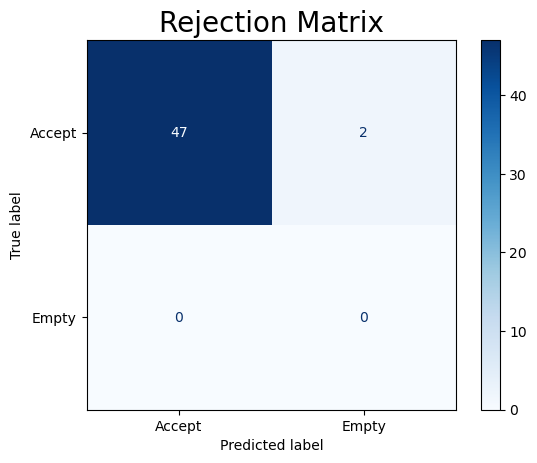

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(colorGT_df['Status'].to_numpy().reshape(-1,1), colorResult_df['Status'].to_numpy().reshape(-1,1),cmap='Blues')
plt.title('Rejection Matrix', fontsize=20)
plt.show()

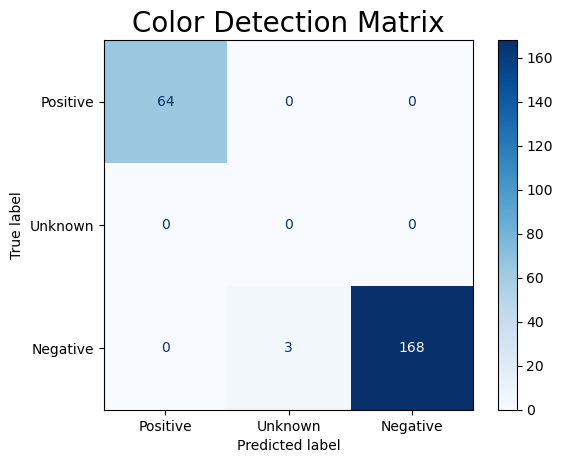

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

idx = (colorGT_df['Status'] == 'Accept') & (colorResult_df['Status'] == 'Accept')

y_true = colorGT_df.loc[idx, 'Tube 2':'Tube 6'].to_numpy().reshape(-1)
y_pred = colorResult_df.loc[idx, 'Tube 2':'Tube 6'].to_numpy().reshape(-1)

class_labels = ['Positive', 'Unknown', 'Negative']

cm = confusion_matrix(y_true, y_pred, labels=class_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues')

plt.title('Color Detection Matrix', fontsize=20)

plt.show()